
# Utilizing NLP to Classify Political Subreddits (Democrats vs Republicans)
## Content List- Part 1

- [Problem Statement](#Problem-Statement)
- [Executive Summary](#Executive-Summary)
- [Data Collection](#Data-Collection)
- [Data Cleaning and EDA](#Data-Cleaning-and-EDA)

## Problem Statement

What patterns exist in online text that we can extract, analyze and use to refine online business models? I will be utilizing Natural Language Processing (NLP) to determine whether the author would be closer aligned to the Democratic or Conservative parties, by analyzing /r/Democrats and /r/Conservative on Reddit. 
The goal will be to build and test an assortment of classification models that can predict whether the author is more likely to hold conservative or liberal views, so that we can advise an online advertiser which ads to run for which audiences.


## Executive Summary

Part 1 of this project focuses on the data gathering, wrangling, cleaning and processing from "Natural Language" to something that computers can interpret and model, specifically numerical values. 

The source of our data is one of the current most popular websites for conversations, discussions and arguments on the internet, none other than www.Reddit.com. Home to over 26 Million monthly users, 850,000 subreddits and 18 billion monthly pageviews, Reddit is one of the premier locations on the internet for distribution, manipulation and consumption of data. What better way for us to test a model's ability to classify input into discrete classes than the hotbed of online discussion itself?

In our efforts to classify the text, we will be combining the text from the title as well as the body of the post in order to maximize our analytical process' capacity. This will provide a larger corpus for each post, which will result in a largely and hopefully more robust corpora to train our algorithm. In comparing the subreddits by the numbers, r/Democrats has less subscribers with 91k as compared to /r/Conservative’s 205k, but how do their word usages stack up?

We begin by utilizing the Reddit API to scrape the information from two politically themed subreddits: /r/Democrats and /r/Republicans. In total, we will attempt to pull 1000 posts per subreddit for a total of 2000, but understand that we may fall short due to duplicates or issues with the API's limits. 

After reading in the data, we ensure there are no duplicate posts, we utilize the Pandas library to convert all title and post text dictionaries into dataframes where the text and subreddit location are included, but the subreddit itself is binarized in order to make it feasible for our model to understand. 

Our dataset is then split up into train and test partitions before being fed into a series of models in order to determine the most apt model for our use. The vectorizers that we will employ in order to tokenize the words and additionally clean the text are: CountVectorizer as well as TF-IDF Vectorizer. Although similar to CountVectorizer, TF-IDF is being utilized due to the vectorizer's purpose in controlling the frequency of terms across documents and datasets alike, introducing penalties for reoccuring words. This will help us in our attempts to understand the online text that we have scraped.

For the model selection, we have many at our disposal but will be utilizing the following: LogisticRegression, MultinomialNaiveBayes, RandomForest and finally AdaBoost. These are models that are adept at classification problems in which we are seeking to understand if something is one of two possibilities, with success being measured in Accuracy.

Before getting to the modeling however, we will save the dataframe to a .csv file, in order to lower the potential for needing to rescrape the data and subsequently starting over on the analytical process. Part 2 of this Notebook will pick up from where the end of Part 1 leaves off, with importing the newly formed .csv files and proceeding as planned.

## Data Collection

#### Import libraries

In [1]:
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
import requests
import time
import numpy as np
import pandas as pd

In [2]:
# Define URL and username
url_democrats = "https://www.reddit.com/r/Democrats/.json" # change subreddit here
url_republicans = "https://www.reddit.com/r/Republicans/.json"
username = {"User-agent": 'omgitsjonnn'}      # header to prevent 429 error```

In [3]:
# Function to pull subreddit posts
def get_subreddit(url, n_pulls, headers):    

    # Create empty templates
    posts = []
    after = None
    duplicates = []
    # Create a loop that does max 25 requests per pull
    for pull_num in range(n_pulls):
        print("Pulling data attempted", pull_num+1,"time(s)")

        if after == None:
            new_url = url                 # base case
        else:
            new_url = url+"?after="+after # subsequent iterations

        res = requests.get(new_url, headers=headers)

        if res.status_code == 200:
            subreddit_json = res.json()                      # Pull JSON
            posts.extend(subreddit_json['data']['children']) # Get subreddit posts
            after = subreddit_json['data']['after']          # 'after' = ID of the last post in this iteration
        else:
            print("We've run into an error. The status code is:", res.status_code)
            break

        time.sleep(1)
        
    return(posts)


In [4]:
get_republicans = get_subreddit(url_republicans, n_pulls = 50, headers= username)

Pulling data attempted 1 time(s)
Pulling data attempted 2 time(s)
Pulling data attempted 3 time(s)
Pulling data attempted 4 time(s)
Pulling data attempted 5 time(s)
Pulling data attempted 6 time(s)
Pulling data attempted 7 time(s)
Pulling data attempted 8 time(s)
Pulling data attempted 9 time(s)
Pulling data attempted 10 time(s)
Pulling data attempted 11 time(s)
Pulling data attempted 12 time(s)
Pulling data attempted 13 time(s)
Pulling data attempted 14 time(s)
Pulling data attempted 15 time(s)
Pulling data attempted 16 time(s)
Pulling data attempted 17 time(s)
Pulling data attempted 18 time(s)
Pulling data attempted 19 time(s)
Pulling data attempted 20 time(s)
Pulling data attempted 21 time(s)
Pulling data attempted 22 time(s)
Pulling data attempted 23 time(s)
Pulling data attempted 24 time(s)
Pulling data attempted 25 time(s)
Pulling data attempted 26 time(s)
Pulling data attempted 27 time(s)
Pulling data attempted 28 time(s)
Pulling data attempted 29 time(s)
Pulling data attempted 

In [5]:
# Call function to get democrats data
get_democrats = get_subreddit(url_democrats, n_pulls = 50, headers = username)

Pulling data attempted 1 time(s)
Pulling data attempted 2 time(s)
Pulling data attempted 3 time(s)
Pulling data attempted 4 time(s)
Pulling data attempted 5 time(s)
Pulling data attempted 6 time(s)
Pulling data attempted 7 time(s)
Pulling data attempted 8 time(s)
Pulling data attempted 9 time(s)
Pulling data attempted 10 time(s)
Pulling data attempted 11 time(s)
Pulling data attempted 12 time(s)
Pulling data attempted 13 time(s)
Pulling data attempted 14 time(s)
Pulling data attempted 15 time(s)
Pulling data attempted 16 time(s)
Pulling data attempted 17 time(s)
Pulling data attempted 18 time(s)
Pulling data attempted 19 time(s)
Pulling data attempted 20 time(s)
Pulling data attempted 21 time(s)
Pulling data attempted 22 time(s)
Pulling data attempted 23 time(s)
Pulling data attempted 24 time(s)
Pulling data attempted 25 time(s)
Pulling data attempted 26 time(s)
Pulling data attempted 27 time(s)
Pulling data attempted 28 time(s)
Pulling data attempted 29 time(s)
Pulling data attempted 

In [6]:
# choosing what information we should be extracting for our analysis
get_democrats[1]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'democrats',
  'selftext': '',
  'author_fullname': 't2_5yzx71bd',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 0,
  'clicked': False,
  'title': "Biden caught on hot mic calling Fox reporter 'a stupid son of a bitch' - Way to go Joe.. Someone had Call Out FoxLies flamethrowers, Jen Psaki is too polite",
  'link_flair_richtext': [{'a': ':snoo_feelsgoodman:',
    'e': 'emoji',
    'u': 'https://emoji.redditmedia.com/nbv1idzmaezz_t5_3nqvj/snoo_feelsgoodman'},
   {'e': 'text', 't': ' Discussion '},
   {'a': ':snoo_thoughtful:',
    'e': 'emoji',
    'u': 'https://emoji.redditmedia.com/7jhvwsc5aezz_t5_3nqvj/snoo_thoughtful'}],
  'subreddit_name_prefixed': 'r/democrats',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': '',
  'downs': 0,
  'thumbnail_height': 78,
  'top_awarded_type': None,
  'hide_score': False,
  'name': 't3_sc0485',
  'quarantine': False,
  'link_flair_text_color': 'light',
  'upvote_ra

In [7]:
#displaying the unique identifier that we will use to differentiate posts
get_republicans[1]['data']['name']

't3_scearb'

In [8]:
#build a function to automatically convert the data from post lists to df
def df_posts(post_list):
    post_titles = []
    dupes = []
    
    for i in range(len(post_list)):
        if post_list[i]['data']['name'] in dupes:
            pass
        else:
            title_dict = {}
            if type(post_list[i]['data']['selftext']) == str:
                title_dict['Post Text']= post_list[i]['data']['title'] + '\n' + post_list[i]['data']['selftext']
            
            else:
                title_dict['Post Text'] = post_list[i]['data']['title']
            title_dict['Subreddit'] = post_list[i]['data']['subreddit']
            title_dict['Length of Title'] = len(post_list[i]['data']['title'])
            title_dict['ID'] = post_list[i]['data']['name']
            post_titles.append(title_dict)
            dupes.append(post_list[i]['data']['name'])

    return pd.DataFrame(post_titles)

In [9]:
#convert the list of democrat posts to a dataframe
dem_df = df_posts(get_democrats)
dem_df.head()

,Post Text,Subreddit,Length of Title,ID
0,Democrats Have a Chance to Flip 24 Federal Cou...,democrats,62,t3_scfgda
1,Biden caught on hot mic calling Fox reporter '...,democrats,156,t3_sc0485
2,Biden calls Fox News reporter Peter Doocy 'a s...,democrats,67,t3_sc1kip
3,How gerrymandering makes the US House intensel...,democrats,56,t3_scdn3o
4,Biden says GOP obstructionism is worse now tha...,democrats,75,t3_sbs636


In [10]:
#convert the list of conservative posts to a dataframe
rep_df = df_posts(get_republicans)
rep_df.shape

(947, 4)

In [11]:
dem_df.head()

,Post Text,Subreddit,Length of Title,ID
0,Democrats Have a Chance to Flip 24 Federal Cou...,democrats,62,t3_scfgda
1,Biden caught on hot mic calling Fox reporter '...,democrats,156,t3_sc0485
2,Biden calls Fox News reporter Peter Doocy 'a s...,democrats,67,t3_sc1kip
3,How gerrymandering makes the US House intensel...,democrats,56,t3_scdn3o
4,Biden says GOP obstructionism is worse now tha...,democrats,75,t3_sbs636


In [12]:
rep_df.head()

,Post Text,Subreddit,Length of Title,ID
0,Kyle Rittenhouse needs to sue the Washington C...,republicans,62,t3_qyl2l1
1,"""Liz Cheney &amp; her Dem friends are using th...",republicans,165,t3_scearb
2,Thank God for that!\n,republicans,19,t3_sci7b6
3,Criminals are targeting cops at historic level...,republicans,84,t3_scdve8
4,You cannot make this shit up. 🤣🤣🤣 --- 🤡🌎\n,republicans,40,t3_sc18ao


In [13]:
#check length of Conservative posts dataframe
len(set(rep_df['ID']))

947

In [14]:
#check length of Democrats posts dataframe
len(set(dem_df['ID']))

578

## Data Cleaning and EDA

In [15]:
#concatenate each df into one master_df
master_df = pd.merge(rep_df, dem_df, how= 'outer')

In [16]:
len(master_df)

1525

In [17]:
#check for nulls
master_df.isnull().sum()

Post Text          0
Subreddit          0
Length of Title    0
ID                 0
dtype: int64

#### Binarizing Target Features: Democrats vs Republicans

In [18]:
#transforming the target into 1 for Democrats and 0 for Conservative
master_df['Subreddit'] = master_df['Subreddit'].map(lambda x : 1 if x == "democrats" else 0)

In [19]:
#verify that the mapping worked
master_df.tail()

,Post Text,Subreddit,Length of Title,ID
1520,Opinion | Why Bob Dole's unsavory post-Senate ...,1,69,t3_rdltcu
1521,"In a largely symbolic move, the Senate votes t...",1,85,t3_rdfuuc
1522,The Jan. 6 committee needs to get louder. Much...,1,54,t3_rcura0
1523,Trump's sedition allies scramble to refuse tes...,1,140,t3_rdfyos
1524,Citizen Enforcement of Abortion Law Violates T...,1,76,t3_rcyikd


In [20]:
# checking to see if any nulls on the Length of Title
master_df.sort_values('Length of Title').head(25)

,Post Text,Subreddit,Length of Title,ID
976,?\n,1,1,t3_sbc8gs
282,🤡🌎\n,0,2,t3_rsonnu
132,ha\n,0,2,t3_s04pau
338,PNN\n,0,3,t3_rqwn1j
926,CNN\n,0,3,t3_r6upo3
54,Boom\n,0,4,t3_s8qgpu
537,Good\n,0,4,t3_rjeqv8
1281,🤦‍♂️\n,1,4,t3_rt2b2s
86,Whoa\n,0,4,t3_s62a0f
167,Truth\n,0,5,t3_rxxcu0


Here we can see quite clearly that there is a correlation between length of post text and class, as 20 out of 25 of the lowest length text are of the Conservative party. This may indicate a higher prevalence of meme usage and thus shorter posts.

In [21]:
### Export dataframe to use 
master_df.to_csv('./data/master_df.csv')

#### Top Frequencies for Subreddits

In [22]:
# import text based modules
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text, _stop_words

In [23]:
additional_politics_english_stop = ['www', 'things', 'does', 'x200b', 'amp', 'want', 'watch',
                           'just', 'like', 'https', 'com', 'republican', 'republicans',
                           'libertarians', 'democrats', 'democrat', 'people', 'libertarian',
                           'says', 'say', 'did', 'this', 'conservative', 'conservatives' ]

additional_english_stop = ['www', 'things', 'does', 'x200b', 'amp',
                           'just', 'like', 'https', 'com', 'watch', 'want',
                           'says', 'say', 'did', 'this']

new_stop_list = _stop_words.ENGLISH_STOP_WORDS.union(additional_english_stop)
new_politics_english_stop_list = _stop_words.ENGLISH_STOP_WORDS.union(additional_politics_english_stop)
print(len(_stop_words.ENGLISH_STOP_WORDS))
print(len(additional_english_stop))
print(len(new_politics_english_stop_list))
print(len(new_stop_list))


318
15
341
332


In [24]:
# code originally written by boom
# Function to count words in each df
def word_counter(title_df,stop_list = []):
    
    # Count Vectorize
    cvec = CountVectorizer(stop_words = stop_list, max_features=15)

    # Transform the corpus
    X_text = cvec.fit_transform(title_df['Post Text'])

    # Converts text to array form
    X_text = pd.DataFrame(X_text.toarray(), columns= cvec.get_feature_names())

    # See word counts
    word_counts = X_text.sum().sort_values(0, ascending=False)
    
    return word_counts

#### Democrats words list  (4 versions)

In [25]:
# no Stop Words
word_counter(dem_df)
# we can see that there is still html jargon that needs to be cleaned further

the          280
to           261
of           154
and          143
in           143
for          120
biden         92
is            88
on            88
trump         82
democrats     60
it            54
that          53
with          47
as            44
dtype: int64

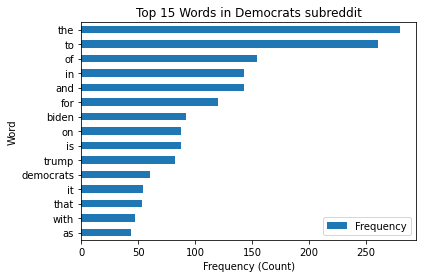

In [26]:
# Democrats Top 15 Words with no stop words
dems_wordcount = pd.DataFrame(word_counter(dem_df), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [27]:
# English Stop Words
word_counter(dem_df, _stop_words.ENGLISH_STOP_WORDS)

biden          92
trump          82
democrats      60
president      38
house          35
voting         30
new            28
says           28
jan            26
republicans    25
court          24
gop            24
joe            24
election       23
senate         22
dtype: int64

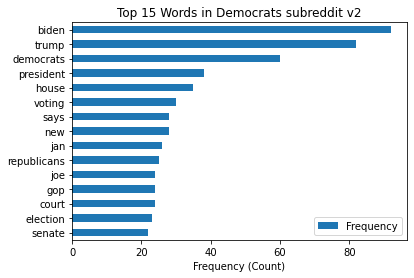

In [28]:
# Democrats Top 15 Words with default english stop words
dems_wordcount = pd.DataFrame(word_counter(dem_df, _stop_words.ENGLISH_STOP_WORDS), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit v2")
plt.xlabel("Frequency (Count)")
plt.show()

In [29]:
#displaying word list with new stop list
word_counter(dem_df,new_stop_list)


biden          92
trump          82
democrats      60
president      38
house          35
voting         30
new            28
jan            26
republicans    25
court          24
gop            24
joe            24
election       23
january        22
rights         22
dtype: int64

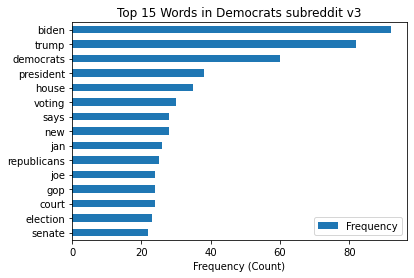

In [30]:
# Democrats Top 15 Words with custom stop words 
dems_wordcount = pd.DataFrame(word_counter(dem_df, _stop_words.ENGLISH_STOP_WORDS), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit v3")
plt.xlabel("Frequency (Count)")
plt.show()

In [31]:
#displaying word list with new political stop list 
word_counter(dem_df, new_politics_english_stop_list)

biden        92
trump        82
president    38
house        35
voting       30
new          28
jan          26
court        24
gop          24
joe          24
election     23
january      22
rights       22
senate       22
white        21
dtype: int64

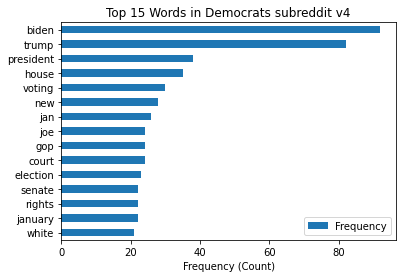

In [32]:
# Democrats Top 15 Words with custom political stop words
dems_wordcount = pd.DataFrame(word_counter(dem_df, new_politics_english_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = dems_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Democrats subreddit v4")
plt.xlabel("Frequency (Count)")
plt.show()

#### Republicans words list (4 versions)

In [34]:
#displaying word list with no stop list
word_counter(rep_df)
# we can see that there is still html jargon that needs to be cleaned further

the      346
to       292
trump    285
of       186
in       184
biden    149
for      149
and      118
is       115
on        97
it        64
with      59
this      58
that      57
from      53
dtype: int64

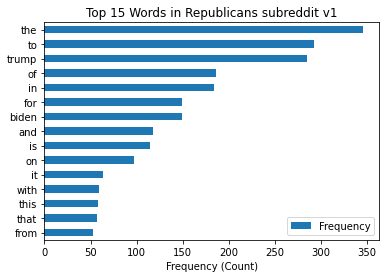

In [35]:
# Republicans Top 15 Words with custom political stop words
cons_wordcount = pd.DataFrame(word_counter(rep_df), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Republicans subreddit v1")
plt.xlabel("Frequency (Count)")
plt.show()

In [38]:
#displaying word list with vanilla english stop list
word_counter(rep_df, _stop_words.ENGLISH_STOP_WORDS)

trump            285
biden            149
joe               42
jan               40
media             39
poll              39
new               38
president         35
says              32
amp               30
gop               30
people            30
donald            29
election          29
newbostonpost     28
dtype: int64

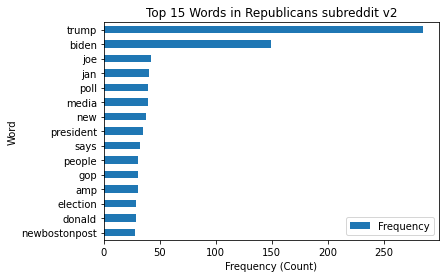

In [40]:
# Republicans Top 15 Words with standard english stop words
cons_wordcount = pd.DataFrame(word_counter(rep_df,_stop_words.ENGLISH_STOP_WORDS), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Republicans subreddit v2")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [41]:
#displaying word list with new stop list
word_counter(rep_df, new_stop_list)

trump            285
biden            149
joe               42
jan               40
media             39
poll              39
new               38
president         35
gop               30
people            30
donald            29
election          29
newbostonpost     28
christmas         27
news              27
dtype: int64

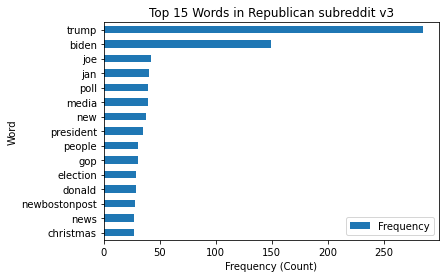

In [42]:
# Republicans Top 15 Words with custom english stop words
cons_wordcount = pd.DataFrame(word_counter(rep_df,new_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Republican subreddit v3")
plt.xlabel("Frequency (Count)")
plt.ylabel("Word")
plt.show()

In [43]:
#displaying word list with new politics stop list
word_counter(rep_df, new_politics_english_stop_list)

trump            285
biden            149
joe               42
jan               40
media             39
poll              39
new               38
president         35
gop               30
donald            29
election          29
newbostonpost     28
christmas         27
cnn               27
news              27
dtype: int64

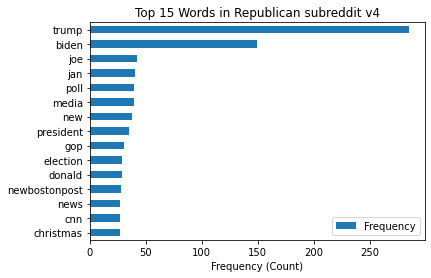

In [44]:
# Republicans Top 15 Words with custom politics stop words
cons_wordcount = pd.DataFrame(word_counter(rep_df,new_politics_english_stop_list), columns=["Frequency"])

# Visualization
politics_top15 = cons_wordcount.head(15)
politics_top15.sort_values('Frequency',ascending=True).plot(kind = "barh")
plt.title("Top 15 Words in Republican subreddit v4")
plt.xlabel("Frequency (Count)")
plt.show()

In [45]:
master_df.head(35)

,Post Text,Subreddit,Length of Title,ID
0,Kyle Rittenhouse needs to sue the Washington C...,0,62,t3_qyl2l1
1,"""Liz Cheney &amp; her Dem friends are using th...",0,165,t3_scearb
2,Thank God for that!\n,0,19,t3_sci7b6
3,Criminals are targeting cops at historic level...,0,84,t3_scdve8
4,You cannot make this shit up. 🤣🤣🤣 --- 🤡🌎\n,0,40,t3_sc18ao
5,Biden’s hot-mic controversy\n,0,27,t3_sccu7x
6,Yet another reason I wished I lived in Texas.\n,0,45,t3_sbwwc6
7,How Republicans Deny People Their Right To Vote\n,0,47,t3_sbi7fy
8,No Biden reboot coming from president who thin...,0,66,t3_sc2gtu
9,"Gingrich: Garland, Jan. 6 Panel Could Go to Ja...",0,69,t3_sbrlbi


In [46]:
master_df.to_csv('./data/master_df.csv', index=False)

## Continue to Part 2
### Please exit notebook and open appropriately titled .ipynb file